In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')

## Principal Component Analysis(PCA)
DEF. 상관관계를 갖는 관측값 변수들의 집합을 직교변환(orthogonal transformation)을 통해 선형 상관관계를 가지지 않는 변수(주성분)들의 집합으로 바꾸는 통계적인 절차. 변환은 첫 번째 주성분이 (자료의 변동성을 가장 많이 설명하도록)가장 큰 분산을 갖고, 그 다음 성분이 이전의 주성분과 직교한다는 제약조건 하에 가장 큰 분산을 가지도록 정의한다.

eg. DAX는 30개의 주식으로 이루어진 주가지수인데, 지수를 구성하는 모든 주가의 움직임은 지수의 움직임을 결정한다. 개별 주가의 움직임들은 일반적인 경제 조건이나 특정한 섹터의 상황에 의해 일반적으로 상관관계를 가지게 된다. 통계적 관점에서 주가지수 하나의 움직임을 설명하기 위해 30개의 상관관계를 갖는 요인을 모두 사용하는 것은 매우 어렵다. 이 때 필요한 것이 주성분 분석이다. 이를 이용하면 주가지수의 움직임을 잘 설명할 수 있으면서도 서로 상관이 없는 몇 개의 성분(주성분)을 유도할 수 있다. 이는 몇 가지 주식을 선택하고 (포트폴리오처럼) 선형적으로 조합하는 것과 마찬가지이다.

PCA의 한계점 http://t-robotics.blogspot.com/2015/12/pca.html#.W26Sg1UzbIW

우리는 지수와 지수를 구성하는 주식들의 자료를 구한 후, pca를 통해 pca_index라는 주성분을 도출할 것이다. 특히 scikit-learn 라이브러리에서 KernelPCA 함수를 이용할 것이다.

In [2]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from sklearn.decomposition import KernelPCA

### DAX Index and its 30 stocks

In [3]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [4]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = pdr.get_data_yahoo(sym, start = '2016-1-1')['Adj Close']
data = data.dropna()
print('')

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [5]:
dax = pd.DataFrame(data.pop('^GDAXI'))
dax

,^GDAXI
Date,
2016-01-04,10283.440430
2016-01-05,10310.099609
2016-01-06,10214.019531
2016-01-07,9979.849609
2016-01-08,9849.339844
2016-01-11,9825.070313
2016-01-12,9985.429688
2016-01-13,9960.959961
2016-01-14,9794.200195


In [6]:
len(data.columns) ## DAX 구성 주식 수

30

In [7]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [8]:
pca = KernelPCA().fit(data.apply(scale_function))

In [9]:
len(pca.lambdas_)

338

In [10]:
pca.lambdas_[:10].round()

array([13105.,  2703.,  1234.,   847.,   541.,   315.,   241.,   147.,
         129.,   117.])

          0
0  0.660849
1  0.797167
2  0.859413
3  0.902110
4  0.929405
5  0.945314
6  0.957468
7  0.964898
8  0.971420
9  0.977334


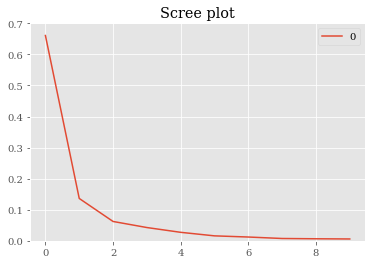

In [11]:
get_we = lambda x: x / x.sum()
top10 = pd.DataFrame(get_we(pca.lambdas_)[:10])
top10.plot(ylim=(0, 0.7), title = "Scree plot")
cumul = top10.cumsum()
print(cumul)

In [12]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

Text(0.5,1,'German DAX index and PCA index with 1 component')

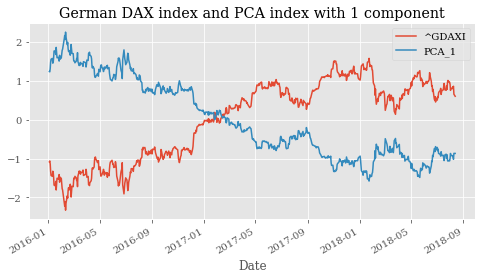

In [13]:
import matplotlib.pyplot as plt
dax.apply(scale_function).plot(figsize = (8, 4))
plt.title('German DAX index and PCA index with 1 component')

In [14]:
pca = KernelPCA(n_components = 5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

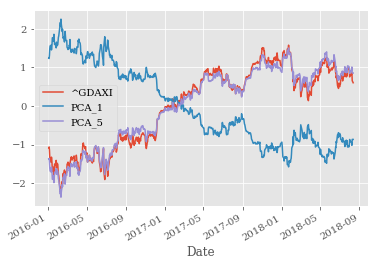

In [15]:
dax.apply(scale_function).plot()

In [16]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates[:6]

array([735967., 735968., 735969., 735970., 735971., 735974.])

In [17]:
dax.columns

Index(['^GDAXI', 'PCA_1', 'PCA_5'], dtype='object')

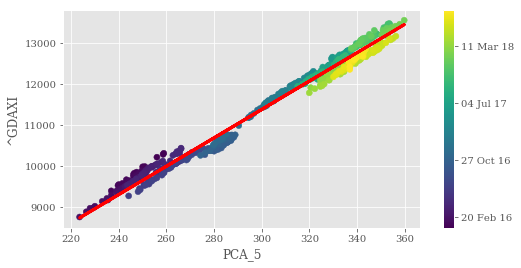

In [18]:
plt.figure(figsize = (8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c = mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                     dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw = 3 )
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval = 250),
             format = mpl.dates.DateFormatter('%d %b %y'))

In [19]:
cut_date = '2017/3/15'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dax['^GDAXI'][dax.index < cut_date], 1),
                       early_pca)

In [20]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, dax['^GDAXI'][dax.index >= cut_date], 1),
                      late_pca)


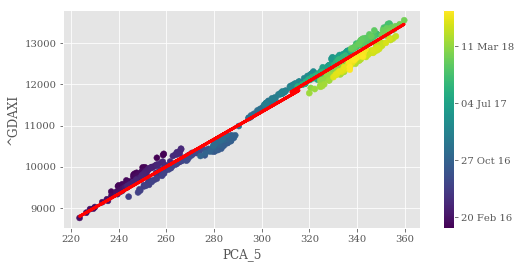

In [21]:
plt.figure(figsize = (8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c = mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw = 3)
plt.plot(late_pca, late_reg, 'r', lw = 3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval = 250),
            format = mpl.dates.DateFormatter('%d %b %y'))

In [1]:
import warnings
warnings.simplefilter('ignore')
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.randn(len(x)) * 2

In [8]:
fitted = np.polyval(np.polyfit(x,y,1),x)

Text(0,0.5,'y')

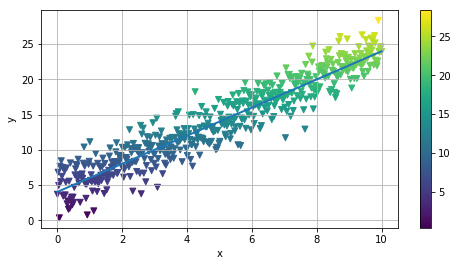

In [9]:
plt.figure(figsize = (8,4))
plt.scatter(x, y, c= y, marker = 'v')
plt.plot(x, fitted, lw = 2)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [12]:
np.polyfit(x,y,1).round(2)

array([1.99, 4.05])

In [15]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sd = 20)
    beta = pm.Normal('beta', mu = 0, sd = 20)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    
    # 선형 회귀선 정의
    y_est = alpha + beta * x
    
    # 우도 정의
    likelihood = pm.Normal('y', mu = y_est, sd = sigma, observed = y)
    
    # 추정 과정
    start = pm.find_MAP() # 사후 확률을 최대화하는 국지점을 계산하여 샘플링 알고리즘의 시작점을 찾는다.
        # 최적화를 사용하여 시작값 추정
    step = pm.NUTS(state=start) # 주어진 사전 확률에 따른 MCMC 샘플링 알고리즘 구현
        # MCMC 샘플링 알고리즘 인스턴스 생성
    trace = pm.sample(100, step, start = start, progressbar = False) # find_MAP에서 구한 초기값과 NUTS 알고리즘에서 구한 최적구간 크기를 사용해 샘플을 생성.
        # NUTS 샘플링을 통한 100개의 사후 샘플 생성

logp = -1,067.3, ||grad|| = 78.647: 100%|█████| 27/27 [00:00<00:00, 930.41it/s]


TypeError: function() got an unexpected keyword argument 'state'

In [14]:
trace[0]

NameError: name 'trace' is not defined